## Assignment 3 - Load Default Feature Engineering

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import scipy.stats as stats
import plotly.io as pio
pio.renderers.default = "notebook"

In [343]:
#read data
df = pd.read_csv('XYZloan_default_selected_vars.csv')
df_dict = pd.read_excel('Variables_Dictionary_2019.xlsx')

### 1. Data Preparation

In [344]:
#Transform the values into numeric format before plotting and working analysis
df = df.apply(pd.to_numeric, errors='coerce') 

#clean the variable dictionary data
df_dict = df_dict.drop(df_dict.columns[0], axis=1)
df_dict = df_dict.drop(df_dict.index[:3])
df_dict.columns = ['NO.', 'Var', 'dtypes', 'description', 'Var_Category']

#only retrieve selected explanatory variables from df
df1 = df[['loan_default', 'AP001','AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']]

#df1 column name references the variable dictionary by joining the content
df1.columns = df1.columns.map(df_dict.set_index('Var')['description'])
df1.columns.values[0] = 'Loan_Default'
df1.head()

,Loan_Default,YR_AGE,CODE_EDUCATION,FLAG_IP_CITY_NOT_APPL_CITY,AMT_LOAN_TOTAL,MONTH_CREDIT_CARD_MOB_MAX,SCORE_SINGLE_DEBIT_CARD_LIMIT,DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL,DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL,TD_CNT_QUERY_LAST_7Day_P2P,TD_CNT_QUERY_LAST_1MON_P2P,TD_CNT_QUERY_LAST_1MON_SMALL_LOAN,TD_CNT_QUERY_LAST_3MON_P2P,TD_CNT_QUERY_LAST_3MON_SMALL_LOAN,TD_CNT_QUERY_LAST_6MON_SMALL_LOAN
0,1,31,1,3,35807,4,2,-1.0,-1.0,1,4,1,5,1,2
1,0,27,1,4,7254,6,11,-1.0,-1.0,2,3,1,3,1,2
2,0,33,4,2,30377,2,3,-1.0,-1.0,2,4,1,5,1,1
3,0,34,4,5,0,5,8,-1.0,-1.0,0,0,0,0,0,1
4,0,47,1,4,0,6,11,-99.0,-99.0,2,2,1,2,1,1


#### Clean NA values

In [345]:
#check df1 has any missing values
missing_values = df1.isnull().sum()
missing_values_per = (df1.isnull().sum() / df.isnull().count())
r = pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage']).reset_index()
r

,index,Count_of_Missing,Percentage
0,Loan_Default,0.0,NaN
1,YR_AGE,0.0,NaN
2,CODE_EDUCATION,0.0,NaN
3,FLAG_IP_CITY_NOT_APPL_CITY,0.0,NaN
4,AMT_LOAN_TOTAL,0.0,NaN
...,...,...,...
99,TD062,NaN,NaN
100,Unnamed: 0,NaN,NaN
101,Unnamed: 0.1,NaN,NaN
102,id,NaN,NaN


In [346]:
#filter the NA values 
def null_cell(df1):
    dfx = df1.copy()
    missing_values = dfx.isnull().sum()
    missing_values_per = dfx.isnull().sum() / dfx.isnull().count()
    null_values = pd.concat([missing_values, missing_values_per],axis=1, keys = ['the_null','the_null_perc'])
    null_values = null_values.sort_values('the_null',ascending=False)
    return null_values[null_values['the_null']>0]

fill_list = (null_cell(df1)).index
fill_list

Index(['DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL', 'DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL'], dtype='object')

In [347]:
#fill mean value into NA cells
df_mean = df1.copy() # Here create a physical copy of df.
for col in fill_list:
    df_mean.loc[:,col].fillna(df_mean.loc[:,col].mean(),inplace=True)

#### Plot the histogram of age group, education, and flag IP city

In [348]:
# Define custom age bins
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60]

# Create labels for the age bins
age_labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60']

df1_age = df1.copy()
# Bin the 'YR_AGE' column using the defined bins and labels
df1_age['Age_Group'] = pd.cut(df1['YR_AGE'], bins=age_bins, labels=age_labels)

# Convert Age_Group column to string
df1_age['Age_Group'] = df1_age['Age_Group'].astype(str)

age_group = df1_age['Age_Group'].value_counts().sort_index()

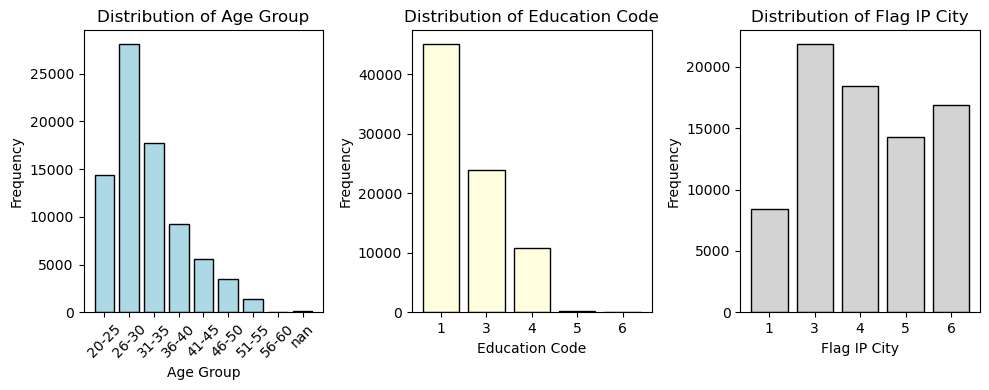

In [349]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

# Plot YR_AGE's histogram
x_ticks = np.arange(len(age_group))
ax1.bar(x_ticks, age_group.values, color='lightblue', edgecolor='black', width=0.8, align='center')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Age Group')
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(age_group.index, rotation=45)

# Plot CODE_EDUCATION's histogram
education_counts = df1_age['CODE_EDUCATION'].value_counts().sort_index()
x_ticks_education = np.arange(len(education_counts))
ax2.bar(x_ticks_education, education_counts.values, color='lightyellow', edgecolor='black', width=0.8, align='center')
ax2.set_xlabel('Education Code')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Education Code')
ax2.set_xticks(x_ticks_education)
ax2.set_xticklabels(education_counts.index)

# Plot FLAG_IP_CITY_NOT_APPL_CITY's histogram
city_counts = df1_age['FLAG_IP_CITY_NOT_APPL_CITY'].value_counts().sort_index()
x_ticks_city = np.arange(len(city_counts))
ax3.bar(x_ticks_city, city_counts.values, color='lightgrey', edgecolor='black', width=0.8, align='center')
ax3.set_xlabel('Flag IP City')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Flag IP City')
ax3.set_xticks(x_ticks_education)
ax3.set_xticklabels(education_counts.index)

plt.tight_layout()
plt.show()

The dataset major age group is in range 20 to 35; further, aged 26-30 occupies the largest one. The education code mainly focuses on Code 1. The flag IP city has evenly distribtion from 3 to 6 but less amount in City 1.

#### The Distribution of Loan Default by Explanatory Variables
**Categorical: Age & Code Education & Flag IP City**

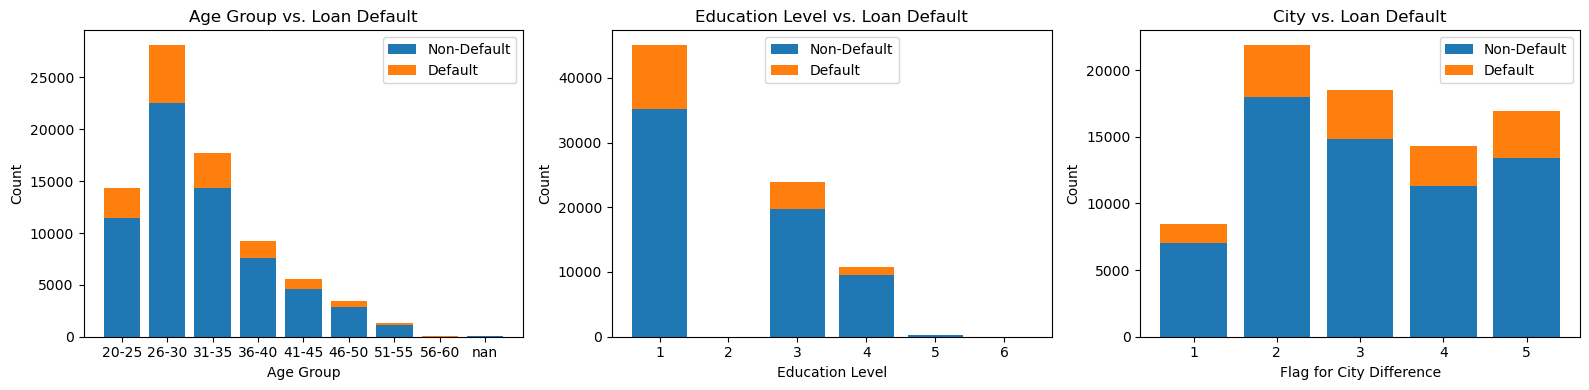

In [408]:
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(16, 4))
# YR_AGE vs. Loan_Default
age_counts = df1_age.groupby('Age_Group')['Loan_Default'].value_counts().unstack()
ax4.bar(age_counts.index,age_counts[0], label='Non-Default')
ax4.bar(age_counts.index, age_counts[1], bottom=age_counts[0], label='Default')
ax4.set_xlabel('Age Group')
ax4.set_ylabel('Count')
ax4.set_title('Age Group vs. Loan Default')
ax4.legend()

# CODE_EDUCATION vs. Loan_Default
education_counts = df_mean.groupby('CODE_EDUCATION')['Loan_Default'].value_counts().unstack() #group education and loan_default altogether to see the frequency
ax5.bar(education_counts.index, education_counts[0], label='Non-Default')
ax5.bar(education_counts.index, education_counts[1], bottom=education_counts[0], label='Default')
ax5.set_xlabel('Education Level')
ax5.set_ylabel('Count')
ax5.set_title('Education Level vs. Loan Default')
ax5.legend()

# FLAG_IP_CITY_NOT_APPL_CITY vs. Loan_Default
city_counts = df_mean.groupby('FLAG_IP_CITY_NOT_APPL_CITY')['Loan_Default'].value_counts().unstack()
ax6.bar(city_counts.index, city_counts[0], label='Non-Default')
ax6.bar(city_counts.index, city_counts[1], bottom=city_counts[0], label='Default')
ax6.set_xlabel('Flag for City Difference')
ax6.set_ylabel('Count')
ax6.set_title('City vs. Loan Default')
plt.legend(['Non-Default', 'Default'])

plt.tight_layout()
plt.show()



- In age group, most of the defaulter occupies in age range 26-30. 
- In education level, the education code 1 has the most defaulters. 
- In different cities, City 2 has the most defaulters, which might because of it has the greatest number of loan applied.

#### Distribution of Loan Default by Numerical Variables

**AMT_LOAN_TOTAL & MONTH_CREDIT_CARD_MOB_MAX & SCORE_SINGLE_DEBIT_CARD_LIMIT vs. Loan_Default**

By undertaking stacked bar chart, it is easily to see the distribution of default and non-default in each categories.

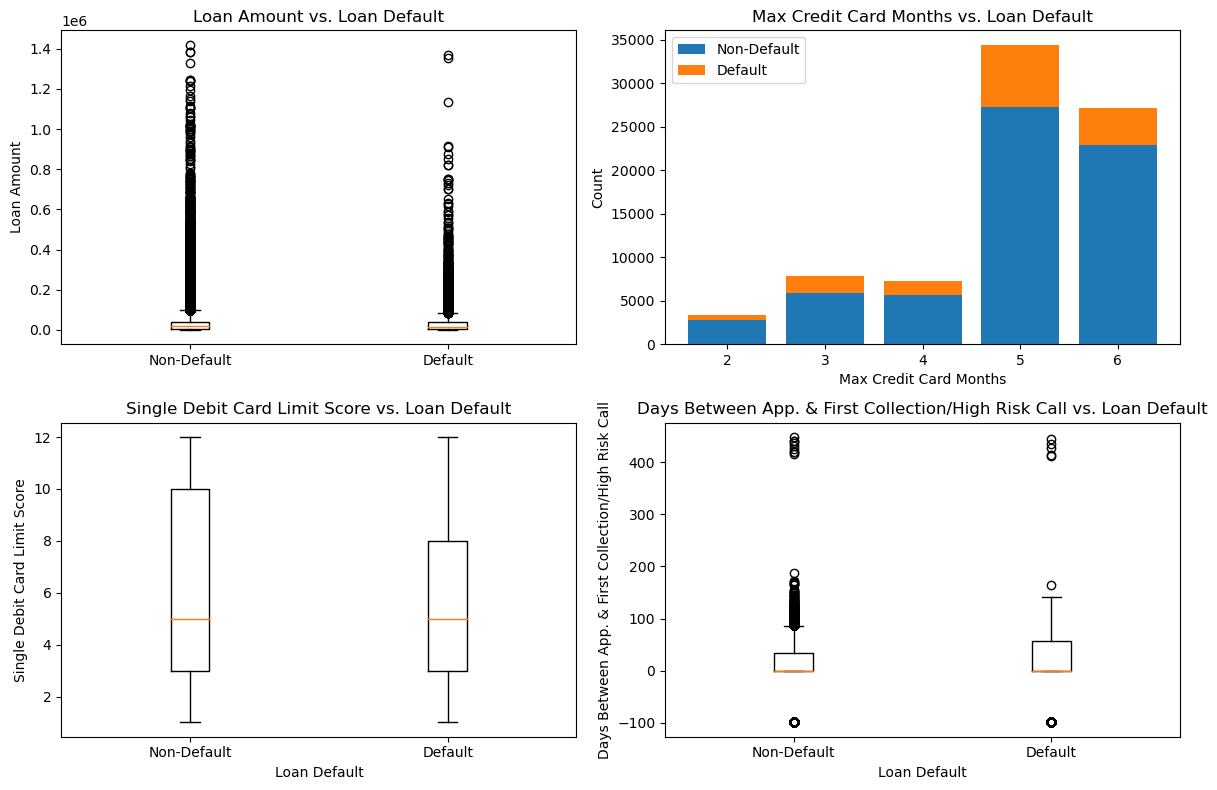

In [403]:
fig, ((ax7, ax8, ax9)) = plt.subplots(1, 3, figsize=(12, 8))
# AMT_LOAN_TOTAL vs. Loan_Default
ax7.boxplot([df_mean.loc[df_mean['Loan_Default'] == 0, 'AMT_LOAN_TOTAL'], df_mean.loc[df_mean['Loan_Default'] == 1, 'AMT_LOAN_TOTAL']])
ax7.set_xticks([1, 2], ['Non-Default', 'Default'])
ax7.set_ylabel('Loan Amount')
ax7.set_title('Loan Amount vs. Loan Default')

#MONTH_CREDIT_CARD_MOB_MAX vs. Loan_Default
credit_mob_counts = df_mean.groupby('MONTH_CREDIT_CARD_MOB_MAX')['Loan_Default'].value_counts().unstack()
ax8.bar(credit_mob_counts.index, credit_mob_counts[0], label='Non-Default')
ax8.bar(credit_mob_counts.index, credit_mob_counts[1], bottom=credit_mob_counts[0], label='Default')
ax8.set_xlabel('Max Credit Card Months')
ax8.set_ylabel('Count')
ax8.set_title('Max Credit Card Months vs. Loan Default')
ax8.legend(['Non-Default', 'Default'])

#SCORE_SINGLE_DEBIT_CARD_LIMIT vs. Loan_Default
ax9.boxplot([df_mean.loc[df_mean['Loan_Default'] == 0, 'SCORE_SINGLE_DEBIT_CARD_LIMIT'],
             df_mean.loc[df_mean['Loan_Default'] == 1, 'SCORE_SINGLE_DEBIT_CARD_LIMIT']], labels=['Non-Default', 'Default'])
ax9.set_xlabel('Loan Default')
ax9.set_ylabel('Single Debit Card Limit Score')
ax9.set_title('Single Debit Card Limit Score vs. Loan Default')

plt.tight_layout()
plt.show()


- Outliers in default boxplot has lower loan amount comparing to non-default boxplot. This might because when great amount of loan is applied, the institution does background or credit check more carefully, which would cause the default loan amount outliers more close to the maximum quartile which is 4th quartile.
- MONTH_CREDIT_CARD_MOB_MAX has most defualters when max credit card months equal to 5.
- SCORE_SINGLE_DEBIT_CARD_LIMIT does not have outliers whereas the thrid quartile in default boxplot is less than non-default because default could cause less limit score for single debit card.


**DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL & DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL vs. Loan_Default**

If the category belongs to time interval, it would be clear when the chart is in boxplot, e.g. days between application and first collection or high risk call.

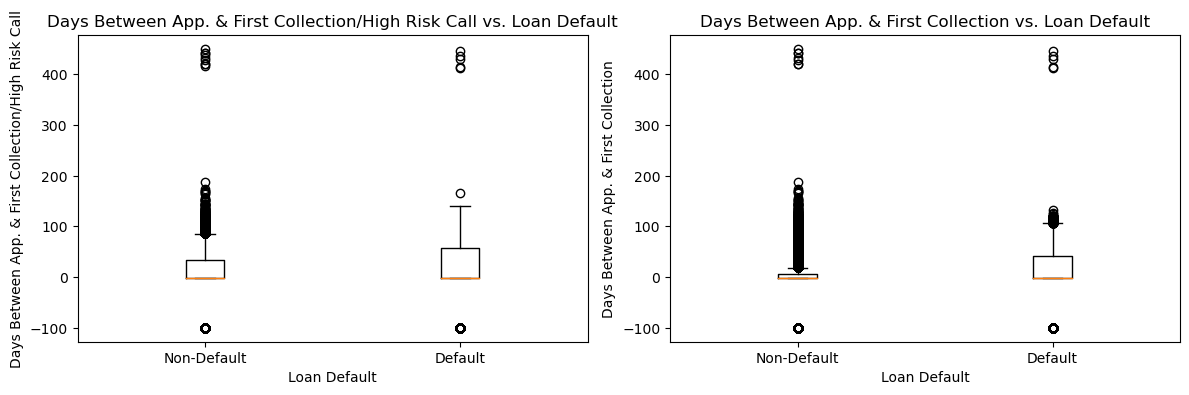

In [411]:
fig, (ax10, ax11) = plt.subplots(1, 2, figsize=(12, 4))
#DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL vs. Loan_Default
ax10.boxplot([df_mean.loc[df_mean['Loan_Default'] == 0, 'DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL'],
             df_mean.loc[df_mean['Loan_Default'] == 1, 'DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL']],
            labels=['Non-Default', 'Default'])
ax10.set_xlabel('Loan Default')
ax10.set_ylabel('Days Between App. & First Collection/High Risk Call')
ax10.set_title('Days Between App. & First Collection/High Risk Call vs. Loan Default')

#DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL
ax11.boxplot([df_mean.loc[df_mean['Loan_Default'] == 0, 'DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL'],
             df_mean.loc[df_mean['Loan_Default'] == 1, 'DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL']],
            labels=['Non-Default', 'Default'])
ax11.set_xlabel('Loan Default')
ax11.set_ylabel('Days Between App. & First Collection')
ax11.set_title('Days Between App. & First Collection vs. Loan Default')

plt.tight_layout()
plt.show()

The outliers of default in days between application and first collection in both charts show less amount comparing to non-default.

**TD_CNT_QUERY_LAST_7Day_P2P & TD_CNT_QUERY_LAST_1MON_P2P & TD_CNT_QUERY_LAST_1MON_SMALL_LOAN & TD_CNT_QUERY_LAST_3MON_P2P & TD_CNT_QUERY_LAST_3MON_SMALL_LOAN & TD_CNT_QUERY_LAST_6MON_SMALL_LOAN vs. Loan_Default**

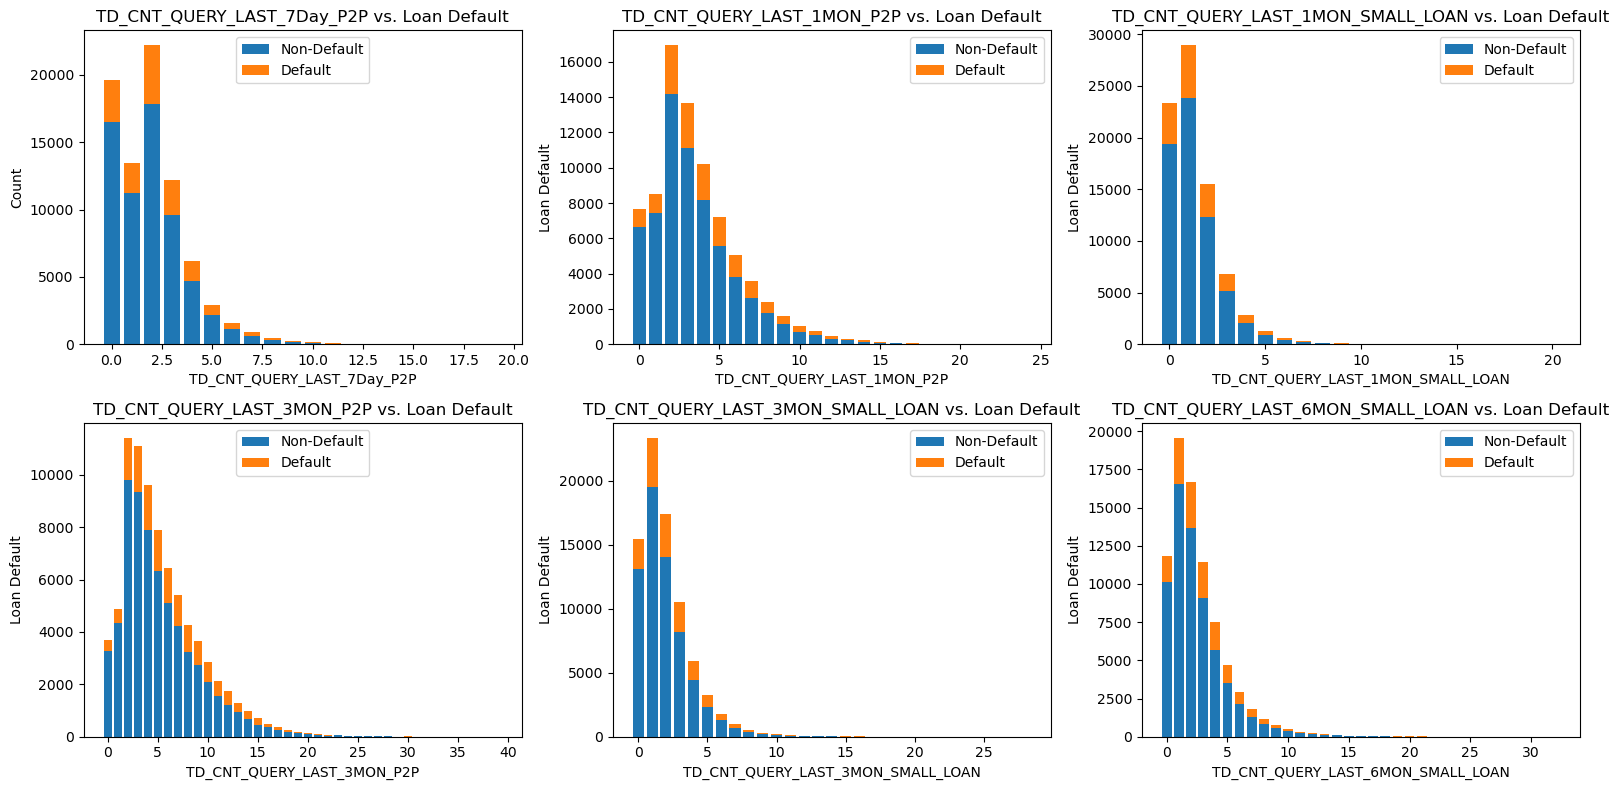

In [423]:
fig, ((ax12, ax13, ax14), (ax15, ax16, ax17)) = plt.subplots(2, 3, figsize=(16, 8))

#TD_CNT_QUERY_LAST_7Day_P2P vs. Loan_Default
counts_7day = df_mean.groupby('TD_CNT_QUERY_LAST_7Day_P2P')['Loan_Default'].value_counts().unstack()
ax12.bar(counts_7day.index, counts_7day[0], label='Non-Default')
ax12.bar(counts_7day.index, counts_7day[1], bottom=counts_7day[0], label='Default')
ax12.set_xlabel('TD_CNT_QUERY_LAST_7Day_P2P')
ax12.set_ylabel('Count')
ax12.set_title('TD_CNT_QUERY_LAST_7Day_P2P vs. Loan Default')
ax12.legend(['Non-Default', 'Default'])

# TD_CNT_QUERY_LAST_1MON_P2P vs. Loan_Default
counts_30day = df_mean.groupby('TD_CNT_QUERY_LAST_1MON_P2P')['Loan_Default'].value_counts().unstack()
ax13.bar(counts_30day.index, counts_30day[0], label='Non-Default')
ax13.bar(counts_30day.index, counts_30day[1], bottom=counts_30day[0], label='Default')
ax13.set_xlabel('TD_CNT_QUERY_LAST_1MON_P2P')
ax13.set_ylabel('Loan Default')
ax13.set_title('TD_CNT_QUERY_LAST_1MON_P2P vs. Loan Default')
ax13.legend(['Non-Default', 'Default'])

#TD_CNT_QUERY_LAST_1MON_SMALL_LOAN vs. Loan_Default
counts_30day_s = df_mean.groupby('TD_CNT_QUERY_LAST_1MON_SMALL_LOAN')['Loan_Default'].value_counts().unstack()
ax14.bar(counts_30day_s.index, counts_30day_s[0], label='Non-Default')
ax14.bar(counts_30day_s.index, counts_30day_s[1], bottom=counts_30day_s[0], label='Default')
ax14.set_xlabel('TD_CNT_QUERY_LAST_1MON_SMALL_LOAN')
ax14.set_ylabel('Loan Default')
ax14.set_title('TD_CNT_QUERY_LAST_1MON_SMALL_LOAN vs. Loan Default')
ax14.legend(['Non-Default', 'Default'], loc = 'upper right')

#TD_CNT_QUERY_LAST_3MON_P2P vs. Loan_Default
counts_3mon = df_mean.groupby('TD_CNT_QUERY_LAST_3MON_P2P')['Loan_Default'].value_counts().unstack()
ax15.bar(counts_3mon.index, counts_3mon[0], label='Non-Default')
ax15.bar(counts_3mon.index, counts_3mon[1], bottom=counts_3mon[0], label='Default')
ax15.set_xlabel('TD_CNT_QUERY_LAST_3MON_P2P')
ax15.set_ylabel('Loan Default')
ax15.set_title('TD_CNT_QUERY_LAST_3MON_P2P vs. Loan Default')
ax15.legend(['Non-Default', 'Default'])

#TD_CNT_QUERY_LAST_3MON_SMALL_LOAN vs. Loan_Default
counts_3mon_s = df_mean.groupby('TD_CNT_QUERY_LAST_3MON_SMALL_LOAN')['Loan_Default'].value_counts().unstack()
ax16.bar(counts_3mon_s.index, counts_3mon_s[0], label='Non-Default')
ax16.bar(counts_3mon_s.index, counts_3mon_s[1], bottom=counts_3mon_s[0], label='Default')
ax16.set_xlabel('TD_CNT_QUERY_LAST_3MON_SMALL_LOAN')
ax16.set_ylabel('Loan Default')
ax16.set_title('TD_CNT_QUERY_LAST_3MON_SMALL_LOAN vs. Loan Default')
ax16.legend(['Non-Default', 'Default'], loc = 'upper right')

#TD_CNT_QUERY_LAST_6MON_SMALL_LOAN vs. Loan_Default
counts_6mon = df_mean.groupby('TD_CNT_QUERY_LAST_6MON_SMALL_LOAN')['Loan_Default'].value_counts().unstack()
ax17.bar(counts_6mon.index, counts_6mon[0], label='Non-Default')
ax17.bar(counts_6mon.index, counts_6mon[1], bottom=counts_6mon[0], label='Default')
ax17.set_xlabel('TD_CNT_QUERY_LAST_6MON_SMALL_LOAN')
ax17.set_ylabel('Loan Default')
ax17.set_title('TD_CNT_QUERY_LAST_6MON_SMALL_LOAN vs. Loan Default')
ax17.legend(['Non-Default', 'Default'], loc = 'upper right')

plt.tight_layout()
plt.show()


All the distributions of loan default by TD_CNT_QUERY_LAST variables display right-skewed and the highest defaulters are all less than 4 TD_CNT_QUERY. When TD_CNT_QUERY is low, the default is high.

## 2. Feature Engineering (WOE)

- Positive WOE means Distribution of Goods > Distribution of Bads
- Negative WOE means Distribution of Goods < Distribution of Bads

In [350]:
#clean my feature variables
features = df_mean.columns.to_list()
features.remove('Loan_Default')

features

['YR_AGE',
 'CODE_EDUCATION',
 'FLAG_IP_CITY_NOT_APPL_CITY',
 'AMT_LOAN_TOTAL',
 'MONTH_CREDIT_CARD_MOB_MAX',
 'SCORE_SINGLE_DEBIT_CARD_LIMIT',
 'DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL',
 'DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL',
 'TD_CNT_QUERY_LAST_7Day_P2P',
 'TD_CNT_QUERY_LAST_1MON_P2P',
 'TD_CNT_QUERY_LAST_1MON_SMALL_LOAN',
 'TD_CNT_QUERY_LAST_3MON_P2P',
 'TD_CNT_QUERY_LAST_3MON_SMALL_LOAN',
 'TD_CNT_QUERY_LAST_6MON_SMALL_LOAN']

In [448]:
#change the good to default and bad to non-default
def WOE(var):
    df_mean[var] = df_mean[var].fillna('NoData')
    k = df_mean[[var,'Loan_Default']].groupby(var)['Loan_Default'].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Default']
    k['Non_Default'] = k['Count'] - k['Default']
    k['Default %'] = (k['Default'] / k['Default'].sum()*100).round(2)
    k['Non_Default %'] = (k['Non_Default'] / k['Non_Default'].sum()*100).round(2)
    k[var+'_WOE'] = np.log(k['Default %']/k['Non_Default %']).round(2)
    k = k.sort_values(by=var+'_WOE')
    return(k)

#Use for loop to loop through all the explanatory variables
for var in features:
    k = WOE(var)
    df2= pd.merge(df_mean[['Loan_Default', var]], k[[var, var + '_WOE']],
                   left_on=var,
                   right_on=var, how='left')
    print(df2.head(5))

   Loan_Default  YR_AGE  YR_AGE_WOE
0             1      31        0.01
1             0      27        0.11
2             0      33       -0.03
3             0      34       -0.04
4             0      47       -0.01
   Loan_Default  CODE_EDUCATION  CODE_EDUCATION_WOE
0             1               1                0.17
1             0               1                0.17
2             0               4               -0.51
3             0               4               -0.51
4             0               1                0.17
   Loan_Default  FLAG_IP_CITY_NOT_APPL_CITY  FLAG_IP_CITY_NOT_APPL_CITY_WOE
0             1                           3                            0.01
1             0                           4                            0.10
2             0                           2                           -0.09
3             0                           5                            0.10
4             0                           4                            0.10
   Loan_Default 

c:\Users\Jessica\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

c:\Users\Jessica\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

c:\Users\Jessica\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

c:\Users\Jessica\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



   Loan_Default  TD_CNT_QUERY_LAST_3MON_P2P  TD_CNT_QUERY_LAST_3MON_P2P_WOE
0             1                           5                            0.01
1             0                           3                           -0.24
2             0                           5                            0.01
3             0                           0                           -0.63
4             0                           2                           -0.39
   Loan_Default  TD_CNT_QUERY_LAST_3MON_SMALL_LOAN  \
0             1                                  1   
1             0                                  1   
2             0                                  1   
3             0                                  0   
4             0                                  1   

   TD_CNT_QUERY_LAST_3MON_SMALL_LOAN_WOE  
0                                  -0.20  
1                                  -0.20  
2                                  -0.20  
3                                  -0.29  
4   

c:\Users\Jessica\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



In [452]:
k = WOE('YR_AGE')
k.sort_values(by='YR_AGE')

,YR_AGE,Count,Default,Non_Default,Default %,Non_Default %,YR_AGE_WOE
0,20,113,25,88,0.16,0.14,0.13
1,21,623,165,458,1.07,0.71,0.41
2,22,1626,339,1287,2.19,1.99,0.10
3,23,2932,600,2332,3.87,3.61,0.07
4,24,4299,860,3439,5.55,5.33,0.04
5,25,4907,1005,3902,6.49,6.05,0.07
6,26,5411,1088,4323,7.02,6.70,0.05
7,27,6323,1337,4986,8.63,7.73,0.11
8,28,5868,1163,4705,7.51,7.29,0.03
9,29,5138,981,4157,6.33,6.44,-0.02


Since I change the distribution of good to default and bad to non-default based on the dataset so the weight of evidence is mostly in negative values. A negative WOE in this case means the distribution of default is less than the distribution of non-default; otherwise, a positive WOE demonstrates the distribution of greater than non-default. The example in Year age variable, age 20 has positive WOE with 0.13, which means it has a medium predicting power of desired dependent variable whilst age 21 has the strong power.

## 3. Modeling with Variables

### 3.1 Decision Tree

In [352]:
df_mean.columns

Index(['Loan_Default', 'YR_AGE', 'CODE_EDUCATION',
       'FLAG_IP_CITY_NOT_APPL_CITY', 'AMT_LOAN_TOTAL',
       'MONTH_CREDIT_CARD_MOB_MAX', 'SCORE_SINGLE_DEBIT_CARD_LIMIT',
       'DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL',
       'DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL',
       'TD_CNT_QUERY_LAST_7Day_P2P', 'TD_CNT_QUERY_LAST_1MON_P2P',
       'TD_CNT_QUERY_LAST_1MON_SMALL_LOAN', 'TD_CNT_QUERY_LAST_3MON_P2P',
       'TD_CNT_QUERY_LAST_3MON_SMALL_LOAN',
       'TD_CNT_QUERY_LAST_6MON_SMALL_LOAN'],
      dtype='object')

In [353]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression

X_train, X_test, Y_train, Y_test = train_test_split(df_mean[features],
                                                    df_mean['Loan_Default'], 
                                                    random_state=0)
#specify the model
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
#train the model
dtree.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

#### The Importance of Variables

In [354]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances


,feature,importance
11,TD_CNT_QUERY_LAST_3MON_P2P,0.389
1,CODE_EDUCATION,0.223
4,MONTH_CREDIT_CARD_MOB_MAX,0.105
6,DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_H...,0.063
9,TD_CNT_QUERY_LAST_1MON_P2P,0.058
7,DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL,0.032
10,TD_CNT_QUERY_LAST_1MON_SMALL_LOAN,0.030
8,TD_CNT_QUERY_LAST_7Day_P2P,0.023
13,TD_CNT_QUERY_LAST_6MON_SMALL_LOAN,0.018
3,AMT_LOAN_TOTAL,0.017


<AxesSubplot:xlabel='feature'>

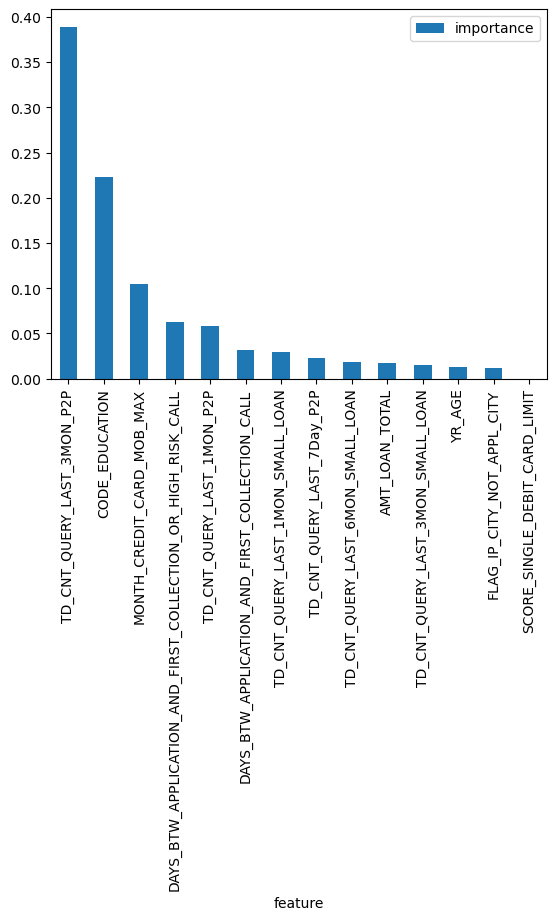

In [355]:
importances.plot.bar(x='feature')

The importance of last 3 months P2P query is the most significant one . Then, the education level and Max Credit Card Months are important variables in this model as well. However, the least important one is single credit card limit score which could be pruned to improve the accuracy of model.

#### Predict new variables

In [356]:
predictions = dtree.predict(X_test[0:10])
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [357]:
dtree.predict_proba(X_test[0:10])

array([[0.88387824, 0.11612176],
       [0.78895899, 0.21104101],
       [0.84810974, 0.15189026],
       [0.88971763, 0.11028237],
       [0.73535273, 0.26464727],
       [0.88107639, 0.11892361],
       [0.88107639, 0.11892361],
       [0.4673913 , 0.5326087 ],
       [0.84937817, 0.15062183],
       [0.73806999, 0.26193001]])

In [358]:
y_pred = dtree.predict_proba(X_test[0:10])[:,1]
y_pred

array([0.11612176, 0.21104101, 0.15189026, 0.11028237, 0.26464727,
       0.11892361, 0.11892361, 0.5326087 , 0.15062183, 0.26193001])

#### Performance

In [359]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

**Confusion Matrix**

In [360]:
predictions = dtree.predict(X_test[features])

#confusion matrix
cm = pd.DataFrame(confusion_matrix(Y_test,predictions))
cm.rename(columns={0:'Predicted Low', 1:'Predicted High'},
         index = {0:'Actual Low',1:'Actual High'},inplace=True)

cm

,Predicted Low,Predicted High
Actual Low,16167,58
Actual High,3720,55


The false positive value is 58-55 = 3, and the false negative value is 16167 - 3720 = 12,447.

**ROC**

In [361]:
y_pred = dtree.predict_proba(X_test[features])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.6336675353830141

In [362]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)
[fpr,tpr]

[array([0.00000000e+00, 1.23266564e-04, 1.84899846e-04, 4.31432974e-04,
        2.71186441e-03, 3.51309707e-03, 3.57473035e-03, 4.00616333e-03,
        5.79352851e-03, 6.28659476e-03, 1.07858243e-02, 1.12172573e-02,
        1.25731895e-02, 1.26348228e-02, 2.36671803e-02, 2.81047766e-02,
        3.53158706e-02, 5.31895223e-02, 5.34360555e-02, 7.90755008e-02,
        8.20338983e-02, 9.74422188e-02, 9.75654854e-02, 1.07303544e-01,
        1.25362096e-01, 1.29676425e-01, 1.35531587e-01, 1.39722650e-01,
        1.47796610e-01, 1.55993837e-01, 1.93097072e-01, 2.08813559e-01,
        2.09183359e-01, 2.11710324e-01, 2.36055470e-01, 2.48382126e-01,
        2.61571649e-01, 3.12295840e-01, 3.17657935e-01, 3.43543914e-01,
        3.95377504e-01, 3.97226502e-01, 4.07457627e-01, 4.56147920e-01,
        4.61078582e-01, 4.81171032e-01, 4.82342065e-01, 5.88597843e-01,
        6.12449923e-01, 6.35069337e-01, 6.72172573e-01, 6.72357473e-01,
        6.75254237e-01, 6.92080123e-01, 6.92758089e-01, 7.461941

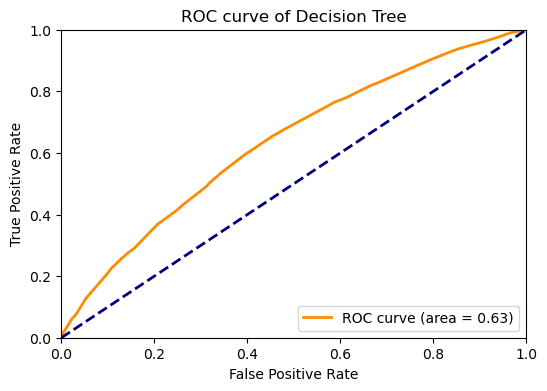

In [363]:
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Decision Tree')
plt.legend(loc='lower right')
plt.show()

The accuracy of model is measured by the receiver operating characteristic curve and the area beneath it. The curve measures the quality of the prediction based on model regardless which classification is selected. The area under the orange ROC curve is 0.63 which is not very strong but still has comparably high probability to rank a random positive example more highly than a random negative example since higher values refers to better predictive ability of binary classification model.

### 3.2 Logistic Regression

In [364]:
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(df_mean[features],
                                                    df_mean['Loan_Default'], 
                                                    random_state=0)

In [365]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000) 
logistic_model.fit(Xr_train,Yr_train)

LogisticRegression(max_iter=1000)

In [366]:
logistic_model.predict(Xr_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [428]:
yr_pred = logistic_model.predict_proba(Xr_test[0:10])[:,1]

#### Performance

In [429]:
logistic_model.score(Xr_test, Yr_test)

0.81125

In [430]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#MAE
# Calculate MAE
mae = mean_absolute_error(Yr_test[0:10], yr_pred)
print("MAE:", mae)

# Calculate RMSE
rmse = mean_squared_error(Yr_test[0:10], yr_pred, squared=False)
print("RMSE:", rmse)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Yr_test[0:10], yr_pred)
auc = roc_auc_score(Yr_test[0:10], yr_pred)
print("AUC:", auc)

MAE: 0.3541233632245677
RMSE: 0.44562138378120736
AUC: 0.6190476190476191


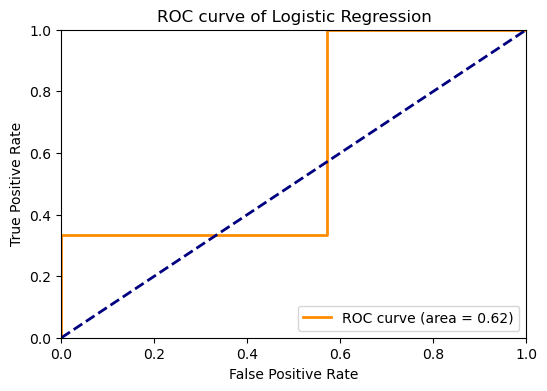

In [432]:
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %auc)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic Regression')
plt.legend(loc='lower right')
plt.show()

The discrete curve here shows the area under the orange ROC curve is about 0.62 which this logistic regression model indicates a good predictive ability whereas it is less stronger than decision tree model which has a better overall performance with 0.63.